In [1]:
import pandas as pd
import numpy as np

In [2]:
crop_data = pd.read_csv("https://raw.githubusercontent.com/ankitaS11/Crop-Yield-Prediction-in-India-using-ML/refs/heads/main/crop_production.csv")

In [3]:
crop_data.sample(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
20326,Assam,KAMRUP,2009,Rabi,Peas & beans (Pulses),1596.0,1273.0
232858,Uttarakhand,CHAMPAWAT,2008,Rabi,Wheat,10043.0,9987.0
161622,Punjab,BATHINDA,2005,Kharif,Rice,95000.0,385000.0
244682,West Bengal,MURSHIDABAD,2009,Autumn,Groundnut,9.0,16.0
98477,Kerala,ERNAKULAM,2009,Winter,Rice,5121.0,10622.0


In [24]:
crop_data = crop_data.dropna(subset=["Production"])

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

In [25]:
features = crop_data.drop(['Production'], axis = 1)
target = crop_data['Production']

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ["State_Name", "District_Name", "Season", "Crop"]:
    le = LabelEncoder()
    crop_data[col] = le.fit_transform(crop_data[col])
    label_encoders[col] = le

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state= 42)

In [31]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [34]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 143211.63
Mean Squared Error (MSE): 30200985678816.60
Root Mean Squared Error (RMSE): 5495542.35
R² Score: 0.92


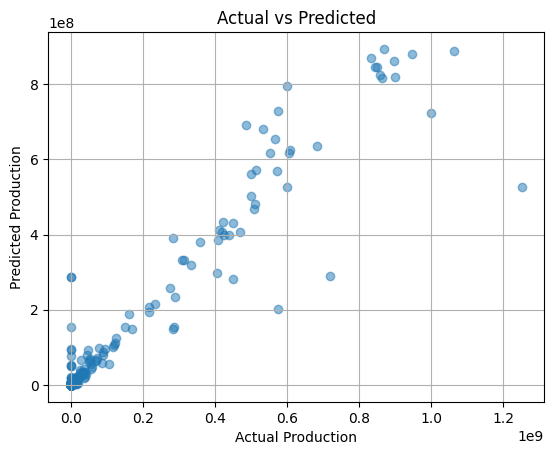

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [36]:
import pickle

# Save the model
with open("crop_production_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Optional: save label encoders too if you're encoding inputs before prediction
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)
